<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
from google.colab import drive

# Accessing google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

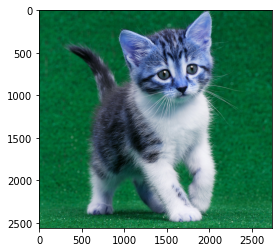

In [3]:
# display image in BGR color channel
genadi = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 2/Source/kitten.jpg')
plt.imshow(genadi)

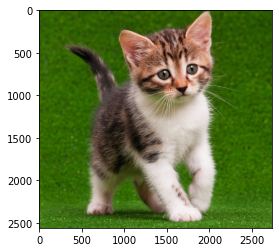

In [4]:
# display image in RGB color channel by converting it from BGR

genadi2 = genadi
genadi3 = cv.cvtColor(genadi, cv.COLOR_BGR2RGB)
plt.imshow(genadi3)

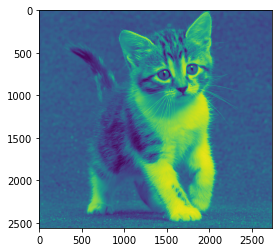

In [5]:
# display image in Gray Scale color channel

genadi_gray = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 2/Source/kitten.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(genadi_gray)

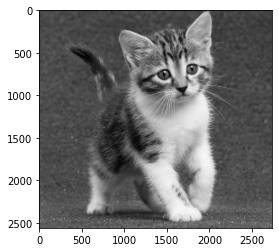

In [6]:
# also change the color map into gray for gray result
plt.imshow(genadi_gray, cmap='gray')

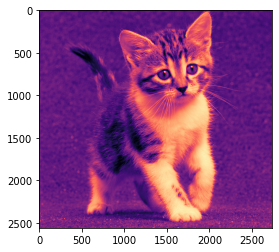

In [7]:
# try 'magma' color map
plt.imshow(genadi_gray, cmap='magma')

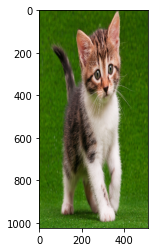

In [8]:
# resizing RGB image to 512x1024
genadi4 = cv.resize(cv.cvtColor(genadi, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(genadi4)

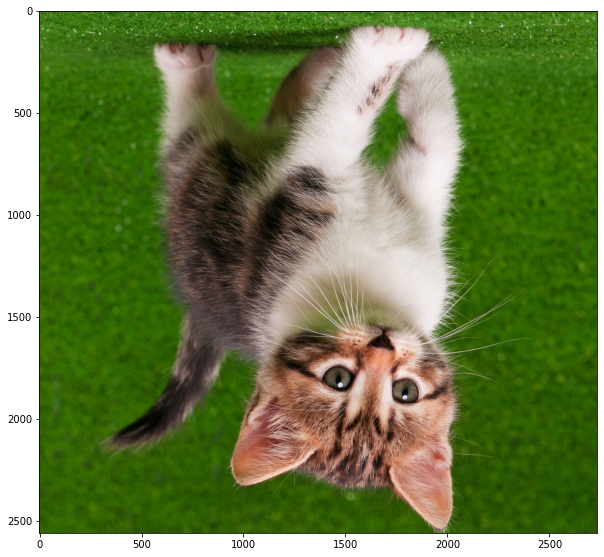

In [9]:
# flip image vertically and resize the canvas size
genadi5 = cv.flip(cv.cvtColor(genadi, cv.COLOR_BGR2RGB), 0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(genadi5)

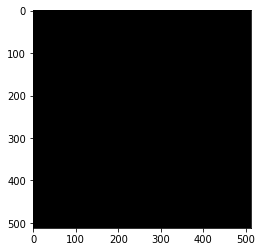

In [10]:
# make 2d geometry starting with black image
black_genadi = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_genadi)

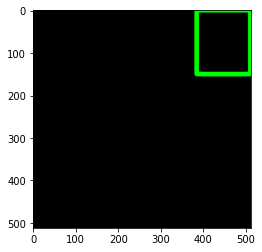

In [11]:
# make square based on coordinates of black image
cv.rectangle(black_genadi, pt1=(384, 0), pt2=(510,150), color=(0,255,0), thickness=10)
plt.imshow(black_genadi)

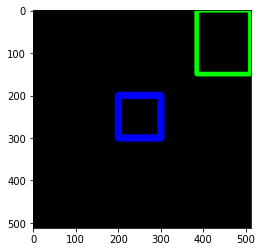

In [12]:
# continue to make square based on coordinates of black image at the center
cv.rectangle(black_genadi, pt1=(200, 200), pt2=(300,300), color=(0,0,255), thickness=15)
plt.imshow(black_genadi)

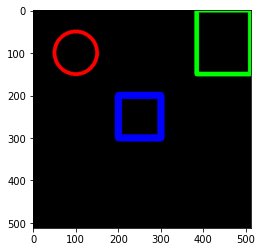

In [13]:
# continue to make circle based on coordinates of black image at the top left
cv.circle(black_genadi, center=(100, 100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_genadi)

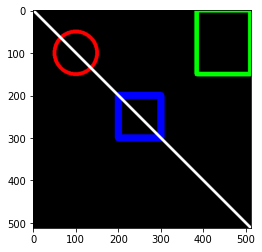

In [14]:
# continue to make crossed diagonal line based on coordinates of black image
cv.line(black_genadi, pt1=(0, 0), pt2=(512,512), color=(255,255,255), thickness=5)
plt.imshow(black_genadi)

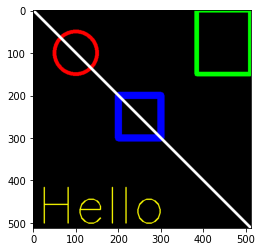

In [15]:
# continue to make text based on coordinates of black image
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_genadi, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_genadi)

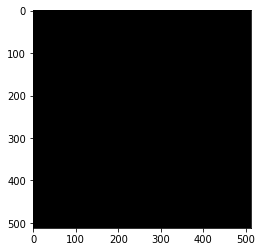

In [16]:
# make 2d geometry again starting with black image with int32 type
black_genadi2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_genadi2)

In [17]:
# intialize numpy array with int32 data type
vertices = np.array([[100,300], [200,200], [400,300], [200,400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [18]:
# reshape the array
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

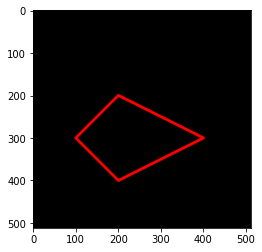

In [19]:
# create polyline for black image with coordinates
cv.polylines(black_genadi2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_genadi2)

# Pertanyaan



1.   Perbedaan yang paling terlihat antara gambar yang ditampilkan dengan matplotlib adalah, terdapat sumbu koordinat x di bagian bawah dan y di bagian kiri gambar yang menunjukan panjang dan lebar gambar tersebut
2.   `int32` memiliki range storage capacity yang lebih besar daripada `int16` sehingga data angka yang tersimpan di dalamnya bisa lebih banyak. Menurut saya, hal ini akan berpengaruh ke seberapa jernih gambar tersebut dan seberapa kompleks piksel-piksel gambar yang bisa ditampilkan ke layar
3.   Maksud dari potongna kode tersebut adalah membuat nilai pada *array* asli tetap utuh, sambil menambahkan dimensi ke-3 ke *array* (sehingga ketika ditampilkan *array* tersebut menjadi tiga dimensi). Dimensi ketiga ini berisi *channel* untuk warna yaitu RGB nantinya.
4.   Fungsi `cv2.imshow()` dan `cv.imshow()` untukm menampilkan gambar dari package bawaan `opencv-python` tidak kompatibel dengan *notebook* Jupyter dan Google Colab. Sehingga sebagai alternatifnya, disajikan modul khusus Google Colab dengan fungsi bernama `cv2_imshow()`.
5. Package `io` pada modul Skimage menyediakan fungsi yang mudah digunakan untuk membaca, menampilkan, dan menyimpan gambar. Salah satu yang digunakan yaitu `imread()` untuk melakukan *load* gambar dari *source* Google Drive

# Tugas


1.   Tampilkan image dalam channel Red-Green dan Green-Blue saja!

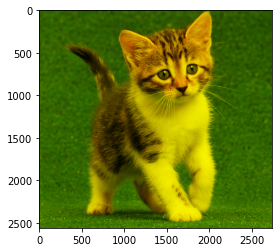

In [20]:
genadi6 = genadi

# split each channel of the image
(B, G, R) = cv.split(genadi6)
# represent zero color by the shape of the image
zeros = np.zeros(genadi6.shape[:2], dtype="uint8")

# show Red + Green color channel only
rg = cv.merge([R,G,zeros])
plt.imshow(rg)

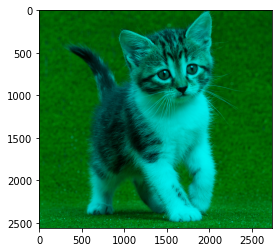

In [21]:
# show Green + Blue color channel only
gb = cv.merge([zeros,G,B])
plt.imshow(gb)


2.   Tampilkan image baris ke 10-100, kolom 10-100!



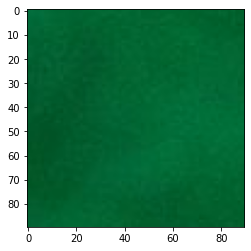

In [22]:
# showing image row 10-100 & column 10-100 [column, row]
genadi7 = genadi6[9:99, 9:99]
plt.imshow(genadi7)

3.    Tampilkan image baris ke 5-30, semua kolom, channel Green saja!

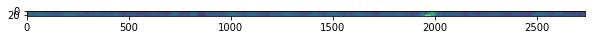

In [23]:
# showing image row 5-30 & all columns [row, column] only in green channel
genadi8 = genadi6[4:29,:,1] # 1 is green channel, 0 -> Blue, 1 -> Green, 2 -> Red

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(genadi8)

4.    Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!

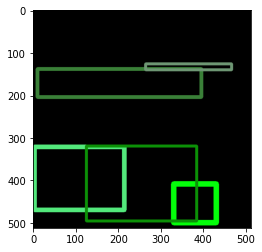

In [24]:
from random import randint

# make 2d geometry starting with black image
black_genadi = np.zeros(shape=(512, 512, 3), dtype=np.int16)

# loop 5 iterations to draw rectangle with random width & height points, random colors and thickness
for _ in range(0, 5):
  cv.rectangle(black_genadi, pt1=(randint(0, 512),randint(0, 512)), pt2=(randint(0, 512),randint(0, 512)), color=(randint(0, 255),randint(0, 255),randint(0, 255)), thickness=randint(5,15))

plt.imshow(black_genadi)

5.   Tampilkan image dengan posisi terbalik!

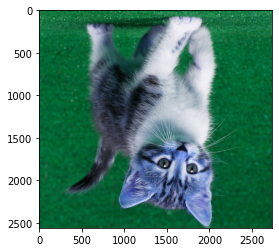

In [25]:
# flip the image vertically

genadi7 = cv.flip(genadi, 0)
plt.imshow(genadi7)

6.    Buat rectangle dan circle pada bagian wajah dari image kitten!

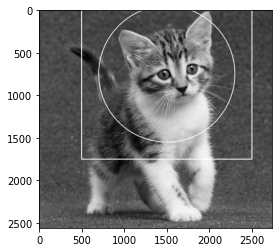

In [26]:
genadi8 = genadi_gray

# create circle with self-estimated value for the center of cat's face
cv.circle(genadi8, center=(1500, 750), radius=800, color=(255,0,0), thickness=8)
# create square with self-estimated value for the center of cat's face
cv.rectangle(genadi8, pt1=(2500, 1750), pt2=(500,0), color=(255,0,0), thickness=10)
plt.imshow(genadi8, cmap='gray')

7.   Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten01.jpg!

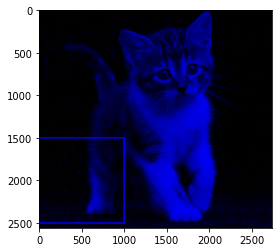

In [27]:
genadi9 = genadi

# split each channel of the image
(B, G, R) = cv.split(genadi9)

# represent zero color by the shape of the image
zeros = np.zeros(genadi9.shape[:2], dtype="uint8")

# create rectangle pt1=[x, y], pt2=[x,y]
cv.rectangle(B, pt1=(1000,2500), pt2=(0,1500), color=(255,255,255), thickness=15)

b = cv.merge([zeros,zeros,B])
plt.imshow(b)